In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load Dataset

In [2]:
ds= load_digits()

In [ ]:
ds.feature_names

In [3]:
df= pd.DataFrame(ds.data, columns= ds.feature_names)
df['target'] = ds.target

In [ ]:
df.info()

In [17]:
df.to_excel('Data_Digits.xlsx',index=False)

# Overreview Dataset

In [18]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [22]:
pd.DataFrame(df.nunique(), columns= ['Number of unique values'])

,Number of unique values
pixel_0_0,1
pixel_0_1,9
pixel_0_2,17
pixel_0_3,17
pixel_0_4,17
...,...
pixel_7_4,17
pixel_7_5,17
pixel_7_6,17
pixel_7_7,17


In [6]:
def value_counts(df, column, n= 10):
    return pd.DataFrame(df[column].value_counts(), columns= ['count']).head(n)

In [ ]:
for col in df.columns:
    print(value_counts(df, col, 3))
    print(10*'*')

In [7]:
columns_with_single_value=[]
for i in range(len(df.nunique())):
    if df.nunique()[i] == 1:
        columns_with_single_value.append(df.columns[i])
columns_with_single_value             

['pixel_0_0', 'pixel_4_0', 'pixel_4_7']

In [8]:
ds.images[22]

array([[ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  1., 13., 11., 16.,  0.,  0.,  0.],
       [ 0.,  0., 10.,  0., 13.,  3.,  0.,  0.],
       [ 0.,  0.,  3.,  1., 16.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  5.,  0.,  0.,  0.],
       [ 0.,  0., 14., 15.,  8.,  8.,  3.,  0.],
       [ 0.,  0.,  7., 12., 12., 12., 13.,  1.]])

In [9]:
ds.data[22]

array([ 0.,  0.,  8., 16.,  5.,  0.,  0.,  0.,  0.,  1., 13., 11., 16.,
        0.,  0.,  0.,  0.,  0., 10.,  0., 13.,  3.,  0.,  0.,  0.,  0.,
        3.,  1., 16.,  1.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,
        0.,  0.,  0.,  3., 15.,  5.,  0.,  0.,  0.,  0.,  0., 14., 15.,
        8.,  8.,  3.,  0.,  0.,  0.,  7., 12., 12., 12., 13.,  1.])

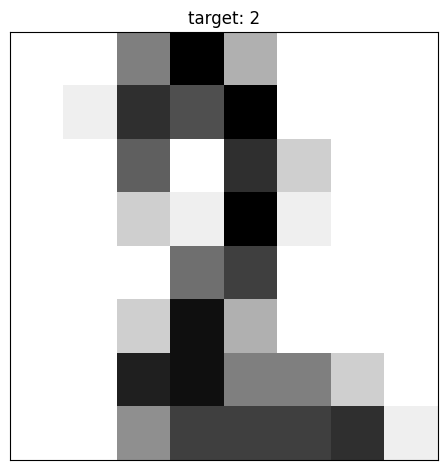

In [10]:
plt.imshow(ds.images[22], cmap= 'gray_r')
plt.title(f'target: {ds.target[22]}')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

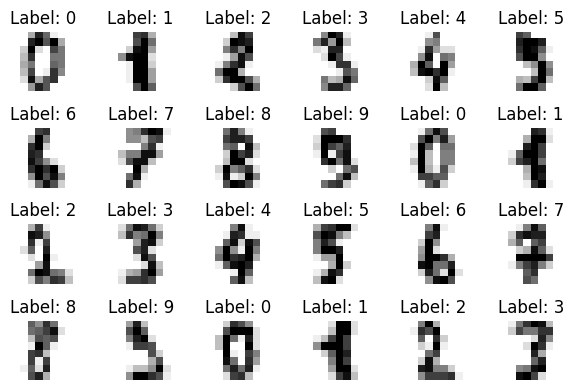

In [72]:
fig, axes= plt.subplots(nrows=4 , ncols=6 , figsize=(6,4))
for item in zip(axes.ravel(), ds.images, ds.target):
    ax, image, target = item
    ax.imshow(image, cmap='gray_r')# ((image, cmap=plt.cm.gray_r))
    ax.set_title(f"Label: {target}")
    ax.axis('off') # axes.set_xticks([])  # remove x-axis tick marks \n # axes.set_yticks([])  # remove y-axis tick marks
plt.tight_layout()

# Data split

In [11]:
X= ds.data
y= ds.target
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .75, random_state= 11)


# Classification with k-Nearest Neighbors (KNeighborsClassifier)

In [168]:
Knn= KNeighborsClassifier()  
"""
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')
"""
Knn.fit(X_train, y_train)

KNeighborsClassifier()

In [169]:
y_pred= Knn.predict(X_test)
y_test[:20]


array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [170]:
y_pred[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [171]:
wrong_prediction= [(p, t) for (p, t) in zip(y_pred, y_test) if p != t]

In [172]:
wrong_prediction

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

In [173]:
# Using the predicted and expected arrays, calculate and display the prediction accuracy percentage
accuracy= (len(y_test) - len(wrong_prediction)) / len(y_test)
accuracy

0.9777777777777777

In [131]:
X=df.drop(['target', 'pixel_0_0', 'pixel_4_0', 'pixel_4_7'], axis= 1)
y=df['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .75, random_state= 11)
Knn= KNeighborsClassifier()  
Knn.fit(X_train, y_train)
y_pred= Knn.predict(X_test)
# wrong_prediction= [(p, t) for (p, t) in zip(y_pred, y_test) if p != t]
# accuracy= (len(y_test) - len(wrong_prediction)) / len(y_test)
# accuracy

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [174]:
score=Knn.score(X_test, y_test)
score

0.9777777777777777

In [175]:
from sklearn.metrics import confusion_matrix, classification_report

print(f'confusion_matric:\n{confusion_matrix(y_test, y_pred)}')

names= [str(name) for name in ds.target_names]
print(classification_report(y_test, y_pred, target_names= names))

confusion_matric:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
 

In [166]:
# K-Fold Cross-Validation
from sklearn.model_selection import KFold, cross_val_score

kfold= KFold(n_splits= 10, random_state= 11, shuffle= True)
scores= cross_val_score(estimator= Knn, X= X, y=y, cv= kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

# Clasification with SVC and GaussianNB

In [12]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
estimators= {'KNeighborsClassifier': KNeighborsClassifier(), 
            'SVC': SVC(gamma= 'scale'),
            'GaussianNB': GaussianNB()}

In [193]:
for estimator_name, estimator_object in estimators.items():
    kfold= KFold(n_splits= 10, random_state= 11, shuffle= True)
    scores= cross_val_score(estimator=estimator_object , X=X, y=y, cv= kfold)
    # print(f'{estimator_name}: ' + 
    #       f'mean accuracy = {scores.mean():0.2%}; ' + 
    #       f'standard deviation = {scores.std():0.2%}')

    print(f'{estimator_name:>20}: ' +  
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


# Hyperparameter Tuning for k-Nearest Neighbors (KNeighborsClassifier)

In [20]:
for k in range(1, 20 ,2):
    kfold= KFold(n_splits= 10, random_state= 11, shuffle= True)
    scores= cross_val_score(estimator= KNeighborsClassifier(n_neighbors= k), X= X, y= y, cv= kfold)
    print(f'{k:<2}: ' + f'mean accuracy= {scores.mean():.2%}; ' + f'Standard deviation= {scores.std():.2%}')

1 : mean accuracy= 98.83%; Standard deviation= 0.58%
3 : mean accuracy= 98.83%; Standard deviation= 0.72%
5 : mean accuracy= 98.72%; Standard deviation= 0.75%
7 : mean accuracy= 98.44%; Standard deviation= 0.96%
9 : mean accuracy= 98.39%; Standard deviation= 0.80%
11: mean accuracy= 98.39%; Standard deviation= 0.80%
13: mean accuracy= 97.89%; Standard deviation= 0.89%
15: mean accuracy= 97.89%; Standard deviation= 1.02%
17: mean accuracy= 97.55%; Standard deviation= 1.06%
19: mean accuracy= 97.66%; Standard deviation= 0.96%


# Unsupervised Machine Learning, —Dimensionality Reduction 

## PCA

In [4]:
from sklearn.decomposition import PCA

In [20]:
X= ds.data
y= ds.target

pca= PCA(n_components= 2, random_state= 11)
X_pca= pca.fit_transform(X)

In [21]:
df_pca= pd.DataFrame(data= X_pca, columns=['pca1' , 'pca2'])
df_pca['target'] = y
df_pca.head()

,pca1,pca2,target
0,-1.259462,21.274859,0
1,7.957614,-20.768710,1
2,6.991919,-9.955967,2
3,-15.906099,3.332440,3
4,23.306866,4.269069,4


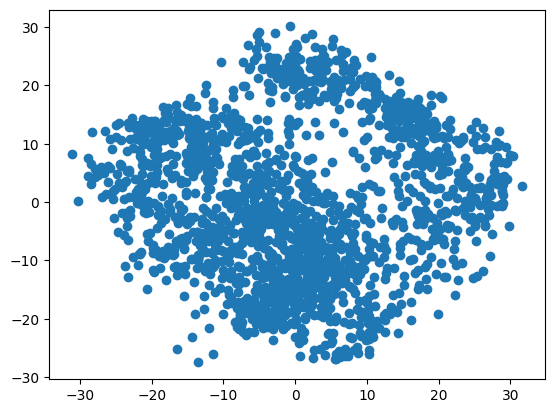

In [22]:
dot= plt.scatter(df_pca['pca1'], df_pca['pca2'])

## t-distributed Stochastic Neighbor Embedding (t-SNE)

In [10]:
from sklearn.manifold import TSNE

In [ ]:
tsne= TSNE(n_components= 2, random_state= 11)
X_tsne= tsne.fit_transform(X)
df_tsne= pd.DataFrame(data= X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['target'] = y
df_tsne.head()

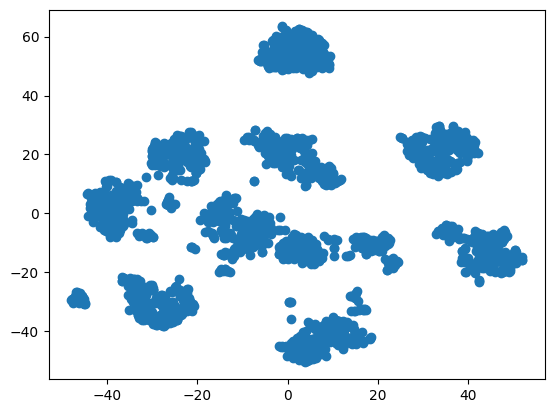

In [18]:
dot= plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'])

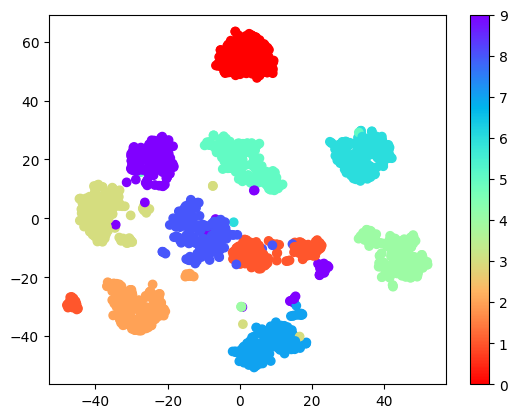

In [29]:
dots= plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], c= df_tsne['target'], cmap= 'rainbow_r')#, 'rainbow')
colorbar= plt.colorbar(dots)

### result:
- There are clearly clusters of related data points, though there appear to be **11 main clusters**.
- There also are “loose” data points that do not appear to be part of specific clusters.

C:\Users\ebsor\AppData\Roaming\Python\Python39\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


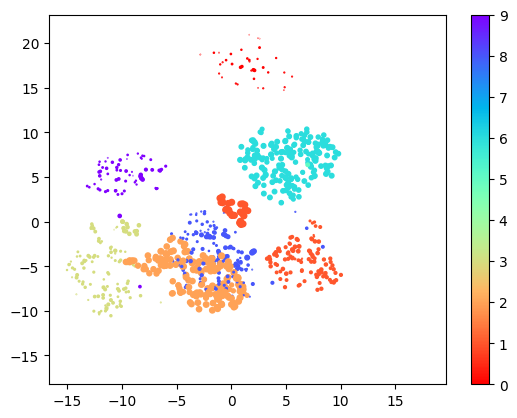

In [35]:
tsne= TSNE(n_components= 3, random_state= 11)
X_tsne= tsne.fit_transform(X)
df_tsne= pd.DataFrame(data= X_tsne, columns=['tsne1', 'tsne2', 'tsne3'])
df_tsne['target'] = y
dots= plt.scatter(df_tsne['tsne1'], df_tsne['tsne2'], df_tsne['tsne3'], c= df_tsne['target'], cmap= 'rainbow_r')#, 'rainbow')
colorbar= plt.colorbar(dots)
